In [1]:
using Dates
using PRMaps
using Plots
using Healpix

using thesis

import Pandas as Pd
import Stripeline as Sl

In [2]:
t_start = DateTime(2022, 1, 1, 12, 0, 0)

sky_model = "s0"
nside = 512
obs_days = 365
 
setup = PRMaps.Setup(
    sampling_freq_Hz = 50.,
    total_time_s = 24. * 3600. * obs_days
)

camera = Sl.CameraAngles()

tel_ang = Sl.TelescopeAngles(
    wheel2ang_0_rad = deg2rad(1.0/60.0)
)

Stripeline.TelescopeAngles(0.0, 0.0002908882086657216, 0.0, 0.0, 0.0, 0.0)

In [3]:
strip = Pd.query(Pd.read_pickle("../instruments/lspe_strip_instrument.pkl"), :(frequency==43.0))
signal = get_foreground_maps(strip, sky_model, nside)[1]
nothing

In [4]:
map_ideal, pixel_ideal = makeIdealMapIQU(camera, signal, setup, t_start)

(PolarizedHealpixMap{Float64, RingOrder, Vector{Float64}}([NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]), PolarizedHealpixMap{Int64, RingOrder, Vector{Int64}}([0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [5]:
map_error, pixel_error = makeErroredMapIQU(camera, tel_ang, signal, setup, t_start)

(PolarizedHealpixMap{Float64, RingOrder, Vector{Float64}}([NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]), PolarizedHealpixMap{Int32, RingOrder, Vector{Int32}}(Int32[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Int32[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Int32[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

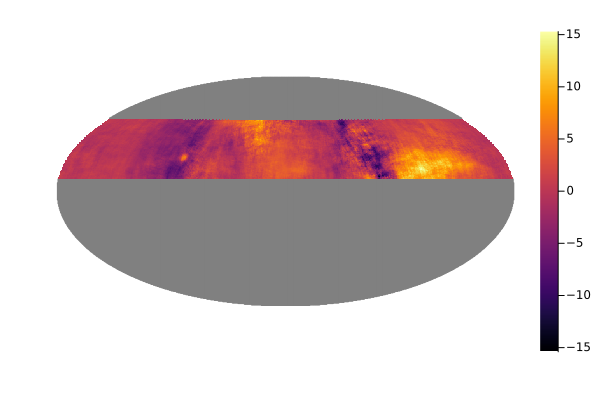

In [6]:
plot(map_error.q)

In [7]:
Healpix.saveToFITS(map_ideal, "!maps_365days/ideal.fits", typechar="D", extname="MAP")
Healpix.saveToFITS(map_error, "!maps_365days/altitude.fits", typechar="D", extname="MAP")

In [8]:
ideal = readPolarizedMapFromFITS("maps_365days/ideal.fits", 1, Float64)
error = readPolarizedMapFromFITS("maps_365days/altitude.fits", 1, Float64)

PolarizedHealpixMap{Float64, RingOrder, Vector{Float64}}([NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN])

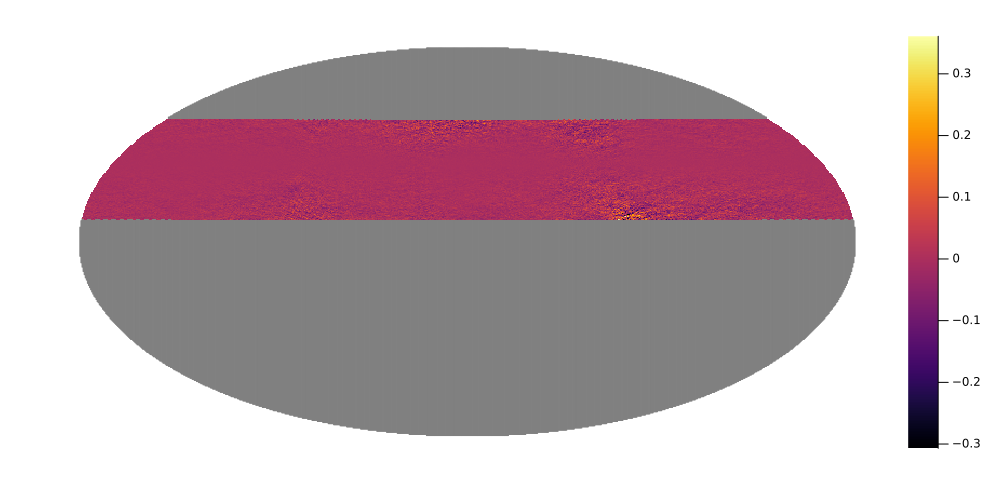

In [16]:
plot(ideal.q - error.q, size = (1000, 500))

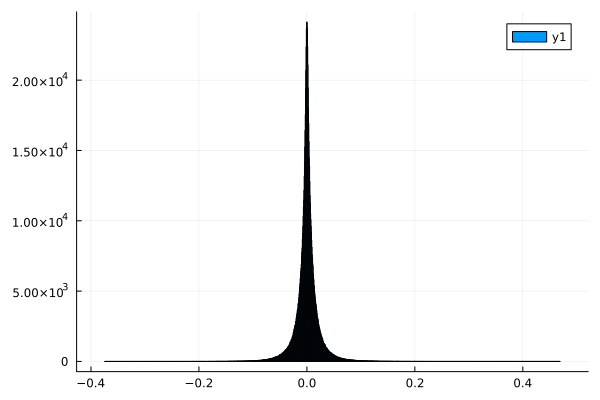

In [10]:
result = ideal.q - error.q
hist = result[isfinite.(result)]
histogram(hist)